In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

<h2>Obtenção Dos Dados</h2>

In [4]:
base_habitacao = pd.read_csv('dataset/Housing.csv')

In [8]:
base_habitacao.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
base_habitacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
pd.set_option('float_format', '{:,.2f}'.format)
base_habitacao.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,"4,766,729.25","5,150.54",2.97,1.29,1.81,0.69
std,"1,870,439.62","2,170.14",0.74,0.50,0.87,0.86
min,"1,750,000.00","1,650.00",1.00,1.00,1.00,0.00
25%,"3,430,000.00","3,600.00",2.00,1.00,1.00,0.00
50%,"4,340,000.00","4,600.00",3.00,1.00,2.00,0.00
75%,"5,740,000.00","6,360.00",3.00,2.00,2.00,1.00
max,"13,300,000.00","16,200.00",6.00,4.00,4.00,3.00


<h2>Label Encoder</h2>

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#0-furnished, 1-semi-furnished, 2-unfurnished
base_habitacao['furnishingstatus'] = LabelEncoder().fit_transform(base_habitacao['furnishingstatus'])

base_habitacao['mainroad'] = LabelEncoder().fit_transform(base_habitacao['mainroad'])
base_habitacao['guestroom'] = LabelEncoder().fit_transform(base_habitacao['guestroom'])
base_habitacao['basement'] = LabelEncoder().fit_transform(base_habitacao['basement'])
base_habitacao['hotwaterheating'] = LabelEncoder().fit_transform(base_habitacao['hotwaterheating'])
base_habitacao['airconditioning'] = LabelEncoder().fit_transform(base_habitacao['airconditioning'])
base_habitacao['prefarea'] = LabelEncoder().fit_transform(base_habitacao['prefarea'])

In [21]:
base_habitacao.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<h2>Análise Exploratória</h2>

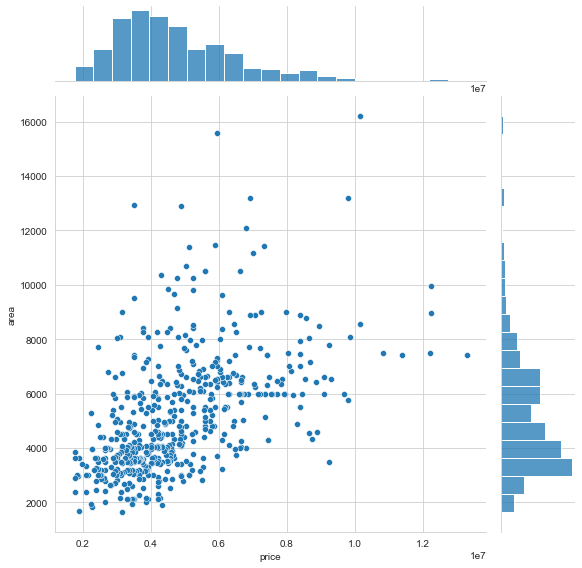

In [26]:
sns.jointplot(data=base_habitacao, x='price', y='area', height=8)

In [29]:
pd.concat([
    base_habitacao['mainroad'].value_counts(),
    base_habitacao['guestroom'].value_counts(),
    base_habitacao['basement'].value_counts(),
    base_habitacao['hotwaterheating'].value_counts(),
    base_habitacao['airconditioning'].value_counts(),
    base_habitacao['prefarea'].value_counts(),
], axis=1)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
1,468,97,191,25,172,128
0,77,448,354,520,373,417


<AxesSubplot:>

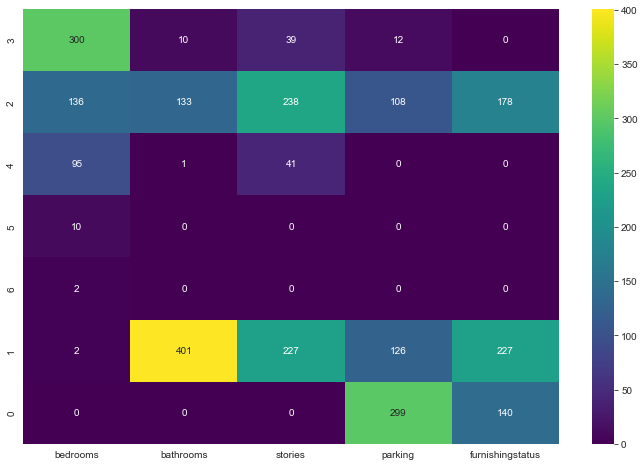

In [41]:
df = pd.concat([
    base_habitacao['bedrooms'].value_counts(), 
    base_habitacao['bathrooms'].value_counts(),
    base_habitacao['stories'].value_counts(),
    base_habitacao['parking'].value_counts(),
    base_habitacao['furnishingstatus'].value_counts(),
], axis=1)

df['bedrooms'][df['bedrooms'].isnull()] = 0.0
df['bathrooms'][df['bathrooms'].isnull()] = 0.0
df['stories'][df['stories'].isnull()] = 0.0
df['parking'][df['parking'].isnull()] = 0.0
df['furnishingstatus'][df['furnishingstatus'].isnull()] = 0.0

plt.figure(figsize=(12,8))
sns.heatmap(df, annot=True, fmt='.0f', cmap='viridis')